# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [79]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']

features = data.drop('MEDV', axis = 1)

# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [86]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

- Its a fair assumption that rooms of houses in vicinity follow some standard for dimensions of a room which implies that dimensions of rooms in vicinity are more or less same, so increase in avg number of rooms in a house will be directly proportional to `'MEDV'`.

- Higher values `'LSTAT'` means higher homeowners in neighborhood are lower class which by definition implies lower `'MEDV'` values so `'LSTAT'` and `'MEDV'` are inversely proportional. 

- Increase in `'PTRATIO'` will probaly result in decrease of `'MEDV'`, as increased `'PTRATIO'` implies low tuition fee which probably is causal effect of the neighbour being relatively lower class.


----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [9]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [10]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


** 
Yes, this model successfully captures the variation of the target variable as we see from R^2 score that the model has 92.3% better accuracy as compared to the naive horizontal mean model.** 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [59]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

test subsets are equivalent to unseen data that is roughly representative of data that the model will be subjected to answer for, in future, so splitting in such a way gives a fair confidence on correctness of the model.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

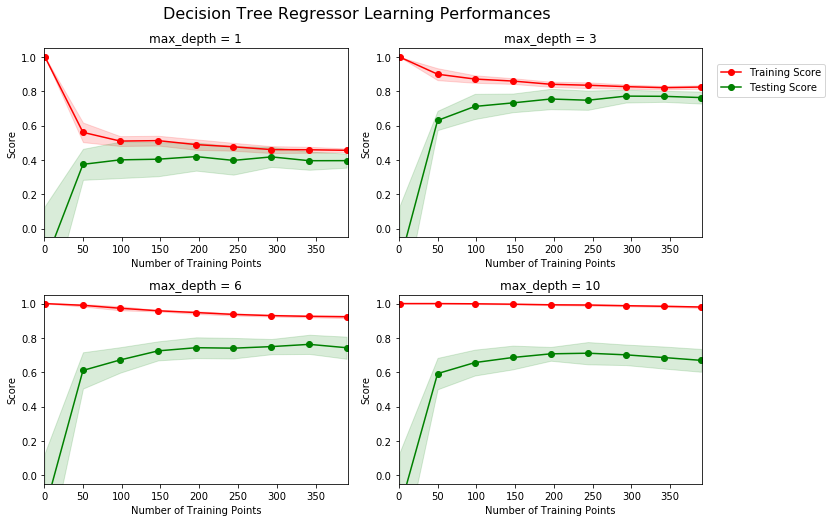

In [15]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

Let's choose 2nd graph with `max_depth` equals 3, for this particular instance it can be seen from graph that beyond 300 training points the model has not learnt anything that would noticeably improve/degrade the correctness(in terms of r^2) of the model implying model has reached saturation so niether **`training`** curve nor **`testing`** curve would show improvements on adding more training points; also implying arguably, that adding more training points won't help improving the model noticeably.

**updates after 1st review**

For model with `max_depth` 3 if we add more data points the testing curve will increase and degrade model performance as can be seen from graph that between 300-350 points at the given complexity(max_depth=3) the testing curve is the lowest, implying that at the given complexity the model learnt the best between 300-350 data point if more data are introduced at this complexity the learning cant rise and will go down as saturation has been reached.

The covergence/level-off of testing curve and training curve can be seen between 300-350

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

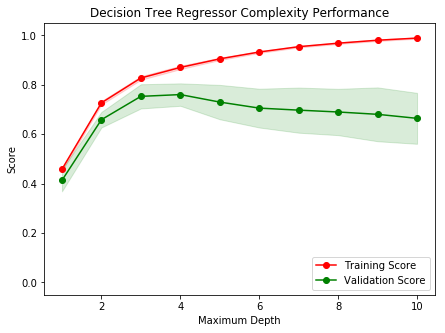

In [16]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

- At `depth` 1 model suffers from high bias as the low r2 score can be attributed to fact that model ignores underlying patterns in data(implied by low training r2 score).
- At `depth` 10 the model is overfitted to training set implied by high r2 score on training set, so model suffers from high variance causing decrease of low r2 score on test set.
- As the model complexity increases uptil `depth` `3` the performance of model increases on both training/test set, after `depth`  the model performs better for training set, on contrast the performance decreases on test set; So at `depth` of 2 we have the sweet spot i.e low-variance low bias model.

**updates after 1st review**(made correction in 2nd point, above)

 large difference between training and validation/testing performance is an implication that model suffers from high variance, we can say that model with max_depth 10 is high variance model as estimater has knowledge of patterns that predicts on seen data with high accuracy but doesnt generalize its learning so well to test set and poorly performs on unseen data, which defeats the whole purpose of modeling.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

At `depth`  3 we have good balance between variance and bias, i.e low variance and low bias , which makes the model with `depth` 3 to be more reliable than models of all the other depths.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

Grid Search is the search for classifier parameters which would result in an optimal model, In this technique we build a number of models based on particular classifier class each of which are based on different combination of parameters, and cross validate these models and the model which performs best among all, the parameter that the best performing model was based on is the solution to Grid Search Problem.

**updates after first review**


one model is prepared from each set of possible combinations of parameters(cartesian product) from each grid.
Example: suppose we have 2 grids as follows

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
 
1st grid is {'C': [1, 10], 'kernel': ['linear']}
2nd grid is {'C': [1, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}

for 1st grid possible combinations of parameters are(cartesian product of param matrices):

combination 1 : C=1, kernel=linear

combination 2 : C=10, kernel =linear


similarly for grid 2:

combination 1 : C=1, gamma = 0.001, kernel =rbf

combination2 : C=1, gamma =0.0001, kernel=rbf

combination 3 : C=10, gamma = 0.001, kernel =rbf

combination 4 : C=10, gamma =0.0001, kernel=rbf


so based on this grid total 6 models can be prepared, each models performance can be computed independently,
Grid search takes one of its parameter `n_jobs` which defaults to 1,i.e how many jobs to run in parallel, with default each models performance is computed one at time but on  multiprocessor system n_jobs can set to `n` to compute `n` model's performance computation at a time.

performance is computed in terms of some metric which corresponds to a scoring function, the model whose performance is highest amongst 6 models , its corresponding parameters are result of grid search so are considered best parameters.

Example: r2_score which can be negative(perfomance poor than naive mean horizontal model), or between 0 to 1, 0 means performance exactly same as naive mean horizontal model, 1 means 100% accuracy.

In [20]:
# Procedure for applying a Grid Search techninque to optime learning algo (code for demonstration is taken from 
# sklearn docs)

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()

# STEP 1
# choose a classifier class of prefernce (in this case we choose C-Support Vector Classifier)
svr = svm.SVC()

# STEP 2
# choose grid of parameters, in this case its a single 2x2 grid i.e parameter 'kernel' can be either 'linear' or 'rbf' 
# and parameter 'C' can be 1 or 10
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

# Step 3 
#pass the classifer and grid to 'GridSearchCV' classifier class

clf = GridSearchCV(svr, parameters)

# STEP 4 
# fit the GridSearchCV classifier from step3 to training set
clf.fit(iris.data, iris.target)

#STEP 5
#  get the optimal paramter values (in this case 'C' is 1 and 'kernel' is 'linear')
clf.best_params_

{'C': 1, 'kernel': 'linear'}

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

In this method:
- we divide dataset in k roughly equal parts.
- choose 1 of those k parts as validation set and rest as training set, and build a model on this.
- we do this k times such that each of k parts are once part of validation set.
- after k iterations we have k models, we compute avg of errors in prediction of validation set of all k models

We can use the k-fold technique to optimize models in grid search as follows:
- for each set of parameters in param grid, we compute result of k-fold cross validation technique.
- the set of parameters which correspond to smallest value of k-fold technique results are considered optimal parameters for the model.

**updates after suggestion made in review:**

cross validation gives a glimpse on how well the model will perform on unseen data by holding out fraction of training data as test/validation set an remaing as training set. folding strengthens CV by ensuring that model gets the chance to see and learn from all patterns available in whole labeled dataset(generalize over all data) we have and helps keep bias in moderation, as opposed to the regular way where model never gets to see the patterns in training set, cross validation makes sure all knowledge available though the dataset is used in building the model, In regular cases where model never gets to learn from test data , the model is likely to underfit the dataset 

why using cross-validation is so useful with grid search?

lets assume CV to mean k-fold CV for simlicity.

CV itself is a techinque to assure quality of the model but it doesn't deal with the parameter tuning for model(which is another model optimization techninque), combing both techniques make model more robust.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [60]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter= 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=42)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [61]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


My guess in Q 6 was max_depth 3, but empirically its 4, since validation score though same at max_depth 4 as max_depth 3 , but training score increased with max_depth 4 as compared to max_depth 3 this might be the only reason , i.e performance on training score increased without any trade-off in validation score.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [92]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3


# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

19.1
Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


- all 3 predict prices fall between min and max prices.

for client 1:
- has moderate number of 'RM', 'LSTAT' and 'PTRATIO' and the predicted price is close to median.

for client 2:
- has low 'RM' which favors low price, has high 'LSTAT' which favors lower price, and high 'PTRATIO' which also favours low price, so the predicted price is lower than other 2 clients , and close to min price. 

for client 3:
- high 'RM' favors high price, low 'LSTAT' favors high price, and low 'PTRATIO'favors high price, so predicted price must be highest amongst 3 client whcih actually is the case accornding to prediction results , and is close to max price.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [53]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

Given that dataset is collected from 1978 and the prices have been scaled to account for property price inflation that happened between 1978 and present day,Following is still an invariant: the individual features in feature set have the same correlation price that it used to be 1978 or before given the city(boston, nothing drastic happened since 1978 that would change the correlation), also the model performance is fairly good i.e ~78% so I consider the model to be useful in real-world setting.
- Its said in begining of this notebook that prices have been scaled to be relevant to present days, that implies that data is still relevant, I cant think of any other reason(given that I dont cross check with current prices on internet or real estate agents) from the context of analytical reasoning on dataset.
- the best regressor model(max_depth=4) shows accuracy of ~78%, for an estimate I think thats a good score for prediction and current set of feature have very good correlation with price, but if we want to have better performance we may look for one or two more features with prefernce of feature inorder of correlation magnitude to the price.
- As seen from the sensivity test a range of $69,044.61 is noticed on 10 prediction of same test data point, so I wont consider the model as robust. 
- if a fractional scaling factor for prices can be computed based on some reasoning, I think the data can be made applicable to rural cities too, although model performance might decrease slightly, patterns from this model might be reused for rural city, but solely using this model for rural city , we might expect unfortunate surprises.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.